# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import sys
import csv
from datetime import datetime

# Used to navigate to project root for api_keys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Add weather detail columns
city_name = []
city_id = []
lat = []
lon = []
unix_dt = []
temp = []
humidity = []
cloudiness = []
windspeed = []

for city in cities:
    try:
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        # Get weather data
        weather_response = requests.get(query_url).json()
        
        print(f"City Name:  {city}, City Number:  {weather_response['id']}")
        
        # cityID, cityName, lat, lon, unix_dt, temp, humidity, cloudiness, windSpeed
        city_id.append(weather_response['id'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        unix_dt.append(weather_response['dt'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
            
        #time.sleep(1)
        
    except:
        print("City not found")
        pass

City Name:  albany, City Number:  5106841
City Name:  homer, City Number:  5864145
City Name:  boende, City Number:  218680
City Name:  punta arenas, City Number:  3874787
City Name:  bluff, City Number:  2206939
City Name:  dikson, City Number:  1507390
City Name:  uruzgan, City Number:  1131461
City Name:  beira, City Number:  1052373
City Name:  broken hill, City Number:  2173911
City Name:  bemidji, City Number:  5017822
City Name:  manaure, City Number:  3675504
City Name:  jamestown, City Number:  5122534
City Name:  santa comba, City Number:  3109966
City Name:  norman wells, City Number:  6089245
City Name:  new norfolk, City Number:  2155415
City Name:  mayumba, City Number:  2399001
City Name:  jumla, City Number:  1283285
City Name:  margate, City Number:  2643044
City Name:  long beach, City Number:  5367929
City not found
City Name:  mataura, City Number:  6201424
City Name:  pisco, City Number:  3932145
City Name:  brigantine, City Number:  4500920
City Name:  maxixe, Cit

City Name:  chokurdakh, City Number:  2126123
City Name:  ustyuzhna, City Number:  477795
City Name:  bathsheba, City Number:  3374083
City Name:  nieuwpoort, City Number:  2790153
City Name:  baykit, City Number:  1510689
City Name:  shingu, City Number:  1847947
City Name:  padang, City Number:  1633419
City Name:  souillac, City Number:  933995
City Name:  boshnyakovo, City Number:  2126493
City Name:  nizhniy odes, City Number:  520552
City Name:  drumnadrochit, City Number:  2650918
City Name:  narsaq, City Number:  3421719
City Name:  te anau, City Number:  2181625
City Name:  guayabetal, City Number:  3681303
City Name:  ancud, City Number:  3899695
City Name:  shubarshi, City Number:  608270
City Name:  alamosa, City Number:  5411479
City Name:  asfi, City Number:  2537881
City Name:  seoul, City Number:  1835848
City Name:  ibra, City Number:  287832
City Name:  villa altagracia, City Number:  3491952
City not found
City Name:  juruti, City Number:  3396979
City Name:  salalah

City not found
City Name:  berlevag, City Number:  780687
City Name:  casa grande, City Number:  5288636
City Name:  cubulco, City Number:  3597837
City Name:  lukovetskiy, City Number:  533418
City Name:  kortkeros, City Number:  544397
City Name:  raudeberg, City Number:  3146487
City Name:  lavrentiya, City Number:  4031637
City Name:  ribeira grande, City Number:  3372707
City Name:  dalvik, City Number:  2632287
City Name:  lagunas, City Number:  3695844
City Name:  saint george, City Number:  5546220
City Name:  pingzhuang, City Number:  2035453
City Name:  chornyanka, City Number:  710653
City not found
City Name:  makat, City Number:  608872
City Name:  constitucion, City Number:  3893726
City Name:  broome, City Number:  5110365
City Name:  albanel, City Number:  5883074
City Name:  longyan, City Number:  1802276
City Name:  kyzyl-suu, City Number:  1527497
City Name:  pingyin, City Number:  1798632
City Name:  chissamba, City Number:  3349580
City Name:  santa cruz, City Numb

City Name:  sawakin, City Number:  367544
City Name:  bari, City Number:  6542001
City Name:  kuryk, City Number:  609919
City Name:  santiago del estero, City Number:  3835869
City Name:  santa maria del oro, City Number:  3984078
City Name:  asau, City Number:  686090
City Name:  watertown, City Number:  4954611
City Name:  bandarbeyla, City Number:  64814
City Name:  khandyga, City Number:  2022773
City Name:  cayenne, City Number:  3382160
City Name:  tezu, City Number:  1254709
City Name:  high level, City Number:  5975004
City Name:  carbonia, City Number:  2525362
City Name:  kichera, City Number:  2022129
City Name:  calafell, City Number:  3127066
City Name:  atikokan, City Number:  5888001
City Name:  talnakh, City Number:  1490256


In [10]:
# Print the city count to confirm sufficient count
len(city_name)

561

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Save data tp dataframe
city_weather_data = pd.DataFrame({
    'city_name':city_name,
    'city_id':city_id,
    'lat':lat,
    'lon':lon,
    'unix_dt':unix_dt,
    'temp':temp,
    'humidity':humidity,
    'cloudiness':cloudiness,
    'windspeed':windspeed
})

# write dataframe to the csv
city_weather_data.to_csv(output_data_file, sep=',', encoding='utf-8', index=False)

# Display dataframe
city_weather_data

,city_name,city_id,lat,lon,unix_dt,temp,humidity,cloudiness,windspeed
0,Albany,5106841,42.60,-73.97,1579578485,-11.60,72,1,3.60
1,Homer,5864145,59.64,-151.55,1579578657,-8.38,92,1,1.50
2,Boende,218680,-0.22,20.87,1579578658,22.93,73,99,0.21
3,Punta Arenas,3874787,-53.15,-70.92,1579578479,12.89,76,75,6.70
4,Bluff,2206939,-46.60,168.33,1579578658,16.80,73,100,2.50
...,...,...,...,...,...,...,...,...,...
556,Carbonia,2525362,39.17,8.52,1579578753,14.69,72,40,12.90
557,Kichera,2022129,55.94,110.10,1579578753,-23.27,76,99,0.30
558,Calafell,3127066,41.20,1.57,1579578753,7.34,87,100,8.70
559,Atikokan,5888001,48.76,-91.62,1579578753,-13.16,93,96,4.39


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

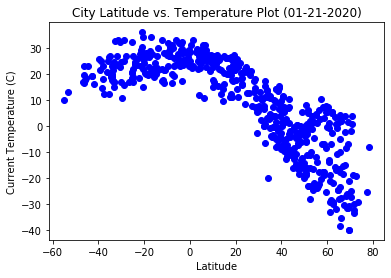

In [49]:
# Isolate data point to plot
lattitude = city_weather_data['lat']
temperature = city_weather_data['temp']

# Plot the lattitude vs tempretature (c) scatter plot
lat_vs_temp_resutls = plt.scatter(lattitude, temperature, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(1579578485).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Temperature Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Current Temperature (C)")

# Save the plot and display it
plt.savefig("../output_data/lat_vs_temp_resutls.png")
plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression